In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import utils
import lr_utils


def train(X, y, scale=True):
  cv = KFold(n_splits=5, shuffle=True, random_state=241)
  X_ = X.copy()
  if scale:
    scaler = StandardScaler()
    X_ = scaler.fit_transform(X_)
  scores = []
  for C in C_range:
    clf = LogisticRegression(C=C, random_state=241)
    score = cross_val_score(estimator=clf, cv=cv, X=X_, y=y, scoring='roc_auc').mean()
    scores.append(score)
  return scores


def train_raw_data(X, y):
  scores = train(X, y)
  lr_utils.plot(C_pows, scores)


def train_data_without_categorical(X, y):
  r_hero_cols, d_hero_cols = utils.get_personal_columns('hero')
  scores = train(X.drop([*r_hero_cols, *d_hero_cols, 'lobby_type'], axis=1), y)
  lr_utils.plot(C_pows, scores)


def train_with_bag_of_words(X, y):
  X = utils.replace_with_bag_of_words(utils.prepare_data(X))
  scores = train(X, y)
  lr_utils.plot(C_pows, scores)

% matplotlib inline

In [3]:
C_pows = range(-5, 1)
C_range = [10.0 ** i for i in C_pows]
train_data = utils.get_data(sample=False)
test_data = utils.get_data(test=True, sample=False)
y = train_data['radiant_win']
X_train = train_data.loc[:, train_data.columns != 'radiant_win']

Значение логистической регрессии на сырых данных оказалось выше, чем у метода градиентного бустинга, при этом скорость заметно выросла

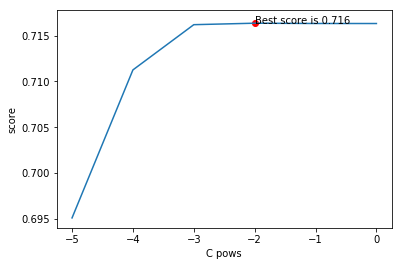

In [5]:
train_raw_data(X_train, y)

Удаление категориальных признаков ни чуть не изменило результат. Лучший счет по прежнему 0.716 и достигается при C = 0.01

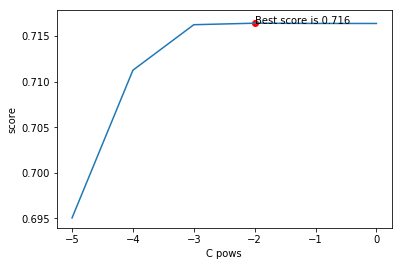

In [6]:
train_data_without_categorical(X_train, y)

Количество уникальных идентификаторов для героев

In [7]:
lr_utils.count_heroes_ids()

112

После добавления мешка слов по героям качество заметно выросло до 0.752

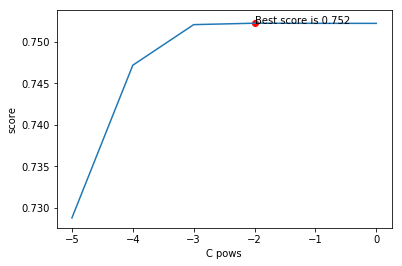

In [8]:
train_with_bag_of_words(X_train, y)

Минимальное значение и максимальное значения предсказаний

In [5]:
X_test = utils.replace_with_bag_of_words(utils.prepare_data(test_data))
clf = LogisticRegression(C=0.01, random_state=241)
clf.fit(utils.replace_with_bag_of_words(utils.prepare_data(X_train)), y)
pred = clf.predict_proba(X_test)[:, 1]
min(pred), max(pred)

(0.0082797737826935738, 0.99582100023691134)